# Titanic. A learning journey

## Introduction
This is a mix that I'm learning from different Titanic noteboks. The main inspiratiors are

* [Titanic Survival Predictions (Beginner)](https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner)
* [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)

Contents: Import Necessary Libraries Read In and Explore the Data Data Analysis Data Visualization Cleaning Data Choosing the Best Model Creating Submission File Any and all feedback is welcome!

## Table of Contents
1. [Define the problem](#ch1)
1. [Read the data](#ch2)


<a id="ch1"></a>

## 1. Define the problem

First thing first. What we are trying to do? 

Titanic. Belfast 1912. The largest ship ever made was struck by an iceberg and sank in his maiden vollage. Safety deficencies caused that more tan 1,500 of the 2,224. Our task is guess if a passenger will survive or not.

Well, let's do it 

<a id="ch2"></a>


## 2. Read the data

To start we begin reading and exploring the data 


In [10]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import train and test CSV files
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

#take a look at the training data
print (train.info())
train.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Keefe, Mr. Arthur",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# A quick lock to the content
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Where are missing values
print(pd.isnull(train).sum())
print(pd.isnull(test).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
[0 1 3 2 4 6 5 9]
[0 1 2 5 3 4 6]


In [19]:
print(test.Parch.unique())
print(train.Parch.unique())

print(test.Embarked.unique())
print(train.Embarked.unique())

[0 1 3 2 4 6 5 9]
[0 1 2 5 3 4 6]
['Q' 'S' 'C']
['S' 'C' 'Q' nan]


# Data recap

   Well, after doig a first look to the data. What we can say?

   * PassengerId: Id of the passenger, doesn't seems relevant
   * Survived: What we want to know (0/1)
   * Pclass: A proxy for SES(Socio-Economic status) (1/2/3). 
   * Name: String with the name. Could we extract some information from here? 
   * Sex: Descriptior of the sex (male/female)
   * Age: Age of the person
   * SibSp: Number of siblings spouses abroad  (0- 8)
   * Parch: Number of parent children abroad (0 - 9)
   * Ticket: String Id of the ticket
   * Fare: Passenger Fare
   * Cabin: Cabin used. A lot of nulls
   * Embark: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
  
      

   First thoughts

   * PClass is a integer but could make sense to tranform to a category?
   * Name + SibSp + Parch + ticket + cabin. Could be used to identify families? 

# discover correlations
  
    First we will try to discover correlations between values and result



In [67]:

for x in train:
    if ((x != "Survived") and (train[x].unique().size <=10)):
        print (x, ": ", train[x].unique().size)
        print (train[["Survived",x]].groupby(x, as_index=False).agg(['count', 'mean']))


Pclass :  3
       Survived          
          count      mean
Pclass                   
1           216  0.629630
2           184  0.472826
3           491  0.242363
Sex :  2
       Survived          
          count      mean
Sex                      
female      314  0.742038
male        577  0.188908
Age :  89
      Survived     
         count mean
Age                
0.42         1  1.0
0.67         1  1.0
0.75         2  1.0
0.83         2  1.0
0.92         1  1.0
...        ...  ...
70.00        2  0.0
70.50        1  0.0
71.00        2  0.0
74.00        1  0.0
80.00        1  1.0

[88 rows x 2 columns]
SibSp :  7
      Survived          
         count      mean
SibSp                   
0          608  0.345395
1          209  0.535885
2           28  0.464286
3           16  0.250000
4           18  0.166667
5            5  0.000000
8            7  0.000000
Parch :  7
      Survived          
         count      mean
Parch                   
0          678  0.343658
1       

Well, this is interesting for what it says and for what is missig.
Class, sex are very imoportant
also it seems that there are a correlation between size of the family (Parch, sibSp) and probabilities of supervivence
what is missing is the age, as is provided is not very useful. We will copy the way that is arranged in the notebook of LD Freeman, and by the way, it seems that he is also doing a interesting thing as is extract the Title form the name. Ok, let's do it 

In [68]:
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
data_val.info()
data1.sample(10)

NameError: name 'data_cleaner' is not defined

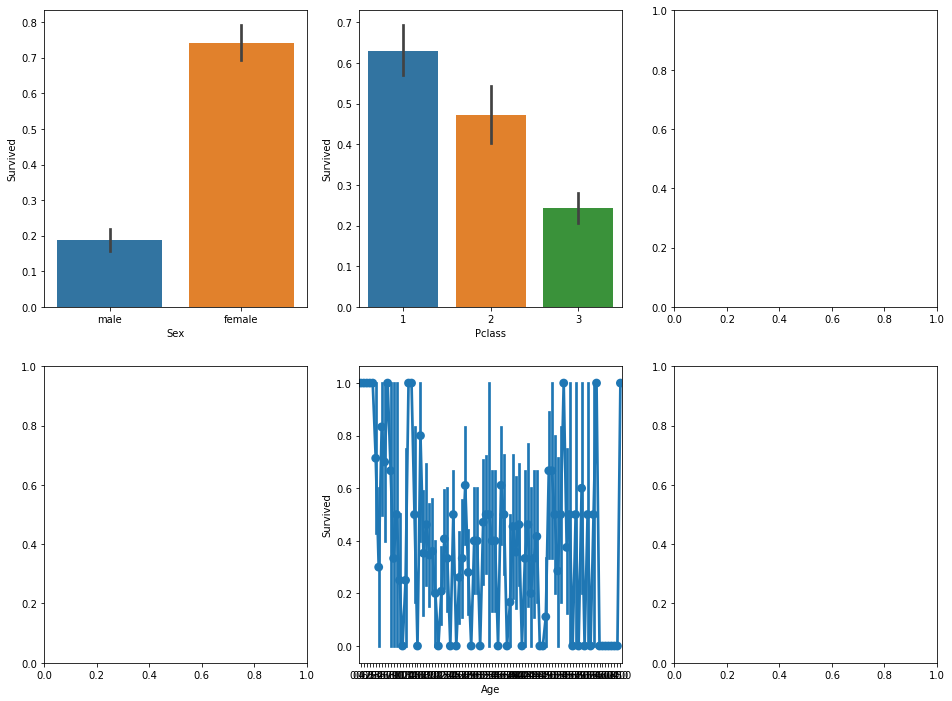

In [29]:
#draw a bar plot of survival by sex
fig, saxis = plt.subplots(2, 3,figsize=(16,12))
sns.barplot(x="Sex", y="Survived", data=train, ax =saxis[0,0])
sns.barplot(x="Pclass", y="Survived", data=train, ax =saxis[0,1])
sns.pointplot(x = 'Age', y = 'Survived',  data=train, ax = saxis[1,1])

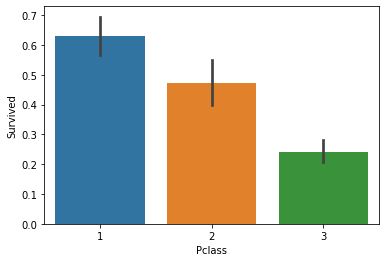

In [22]:
sns.barplot(x="Pclass", y="Survived", data=train)